In [ ]:

import numpy as np
from numpy.ma.core import argmax
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import os
import time
from sklearn.metrics import confusion_matrix, accuracy_score, auc
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras.datasets import imdb

17464789/17464789 [==============================] - 0s 0us/step
Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


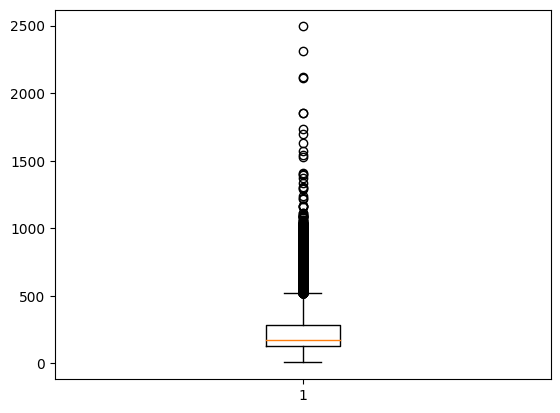

In [ ]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Exploring the Data
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))
print("Number of words: ")
print(len(np.unique(np.hstack(X))))
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result))) # Ploting the review length
plt.boxplot(result)
plt.show()

In [ ]:
def vectorize_sequences(sequences, dimension=5000): # Function for vectorising data
    results = np.zeros((len(sequences), dimension)) # Creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Set specific indices of results[i] to 1s
    return results

In [ ]:
# Creating Training and Testing Sets and Preprocessing them
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Creating the DNN Model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Set validation set aside
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Compiling Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5544 - acc: 0.7545 - val_loss: 0.3799 - val_acc: 0.8562
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2897 - acc: 0.8941 - val_loss: 0.2998 - val_acc: 0.8782
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2091 - acc: 0.9239 - val_loss: 0.2875 - val_acc: 0.8841
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1686 - acc: 0.9408 - val_loss: 0.3057 - val_acc: 0.8764
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1400 - acc: 0.9509 - val_loss: 0.3281 - val_acc: 0.8773
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1164 - acc: 0.9615 - val_loss: 0.3494 - val_acc: 0.8708
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0952 - acc: 0.9698 - val_loss: 0.3876 - val_acc: 0.8694
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0752 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

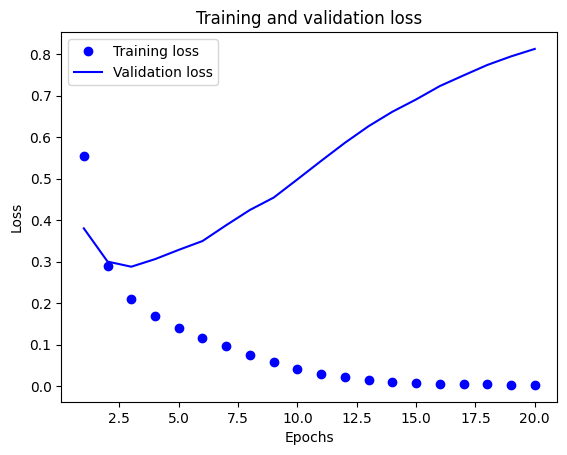

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting model loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

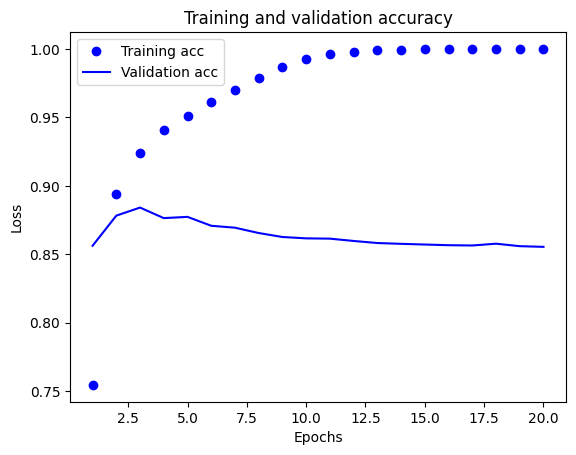

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

# Plotting model accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161121 (629.38 KB)
Trainable params: 161121 (629.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
782/782 [==============================] - 2s 2ms/step
[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

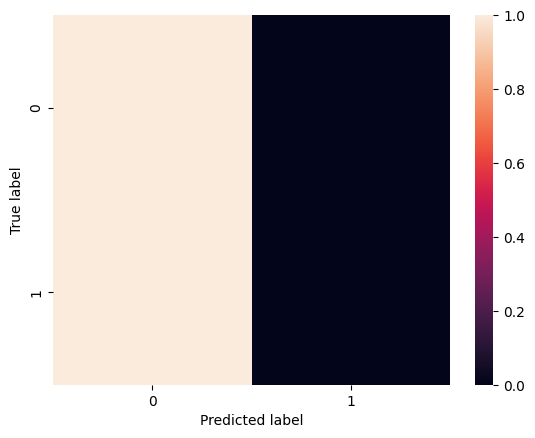

In [ ]:
# Model Summary
print(model.summary())

# Predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)
accuracy_score(y_test,classes_x)

#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Dense with Two Layer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compiling Model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2
print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5200 - acc: 0.7617 - val_loss: 0.3283 - val_acc: 0.8681
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2508 - acc: 0.9029 - val_loss: 0.2911 - val_acc: 0.8876
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1771 - acc: 0.9359 - val_loss: 0.3197 - val_acc: 0.8747
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1400 - acc: 0.9518 - val_loss: 0.3607 - val_acc: 0.8717
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1146 - acc: 0.9587 - val_loss: 0.3937 - val_acc: 0.8680
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0889 - acc: 0.9691 - val_loss: 0.4338 - val_acc: 0.8660
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0618 - acc: 0.9819 - val_loss: 0.4943 - val_acc: 0.8625
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0434 - a

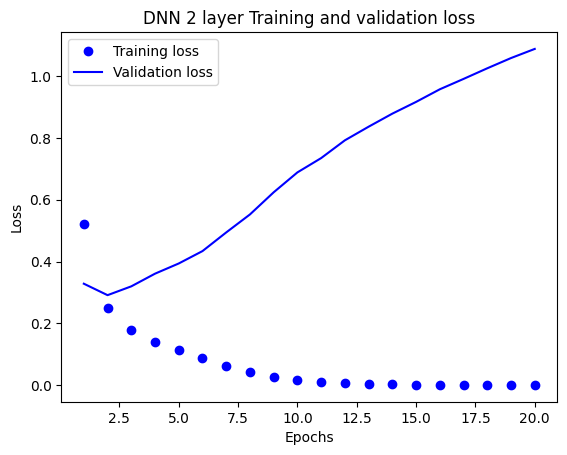

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting Loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

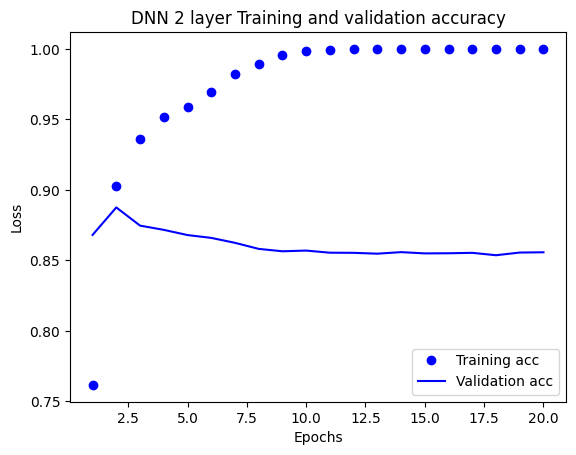

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
# Plotting Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(model2.summary())
# Predictions
pred = model2.predict(x_test)
classes_x=np.argmax(pred,axis=-1)
accuracy_score(y_test,classes_x)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162177 (633.50 KB)
Trainable params: 162177 (633.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
782/782 [==============================] - 1s 1ms/step


0.5